<a href="https://colab.research.google.com/github/gracektan/Computer-Vision-Project/blob/main/idk%20why%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1> <b> Object Detection Using YOLO <b> </h1></center>

Importing required Libraries

In [242]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import cv2
import seaborn as sns
import glob
import xml.etree.ElementTree as ET
from PIL import Image
import os
import shutil

# My Dataset Description: Mask Detection

Object detection: Face Mask Detection:
*   https://www.kaggle.com/datasets/andrewmvd/face-mask-detection/data
*   https://www.kaggle.com/datasets/andrewmvd/face-mask-detection/code

For annotations, I used: https://www.makesense.ai/
* Made my annotations image #0-30 ⇐ test
* Their annotations image #30-60 ⇐ train



# Setting up folders
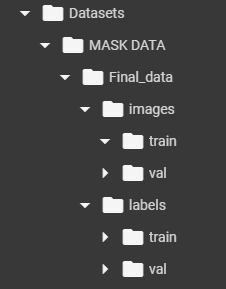

Referenced from: https://www.google.com/search?q=If+my+google+collab+is+in+my+git+hub+repo%2C+who+do+I+access+the+files+in+the+git+hubrepo&rlz=1C1ONGR_enCA1089CA1089&oq=If+my+google+collab+is+in+my+git+hub+repo%2C+who+do+I+access+the+files+in+the+git+hubrepo&gs_lcrp=EgZjaHJvbWUyBggAEEUYOdIBBzM5OWowajeoAgCwAgA&sourceid=chrome&ie=UTF-8

To figure out how to get file from github

In [227]:
!git clone https://github.com/gracektan/Computer-Vision-Project.git '/content/drive/MyDrive/Computer-Vision-Project'
file_path = '/content/drive/MyDrive/Computer-Vision-Project/example.txt'

fatal: destination path '/content/drive/MyDrive/Computer-Vision-Project' already exists and is not an empty directory.


In [228]:
# Create necessary directories
os.makedirs('/content/drive/MyDrive/Datasets/MASK DATA/Final_data/images/train', exist_ok=True)
os.makedirs('/content/drive/MyDrive/Datasets/MASK DATA/Final_data/images/val', exist_ok=True)
os.makedirs('/content/drive/MyDrive/Datasets/MASK DATA/Final_data/labels/train', exist_ok=True)
os.makedirs('/content/drive/MyDrive/Datasets/MASK DATA/Final_data/labels/val', exist_ok=True)

In [229]:
# Set the paths to labels and images directory
label_dir = "/content/drive/MyDrive/Datasets/MASK DATA/Final_data/labels"
image_dir = "/content/drive/MyDrive/Datasets/MASK DATA/Final_data/images"

In [230]:
# Set the paths to training and testing directories
train_annotation_dir = "/content/drive/MyDrive/Computer-Vision-Project/train_image31-60/annotation"
train_image_dir = "/content/drive/MyDrive/Computer-Vision-Project/train_image31-60/image"
test_annotation_dir = "/content/drive/MyDrive/Computer-Vision-Project/test_image0_30/annotation"
test_image_dir = "/content/drive/MyDrive/Computer-Vision-Project/test_image0_30/image"

In [231]:
# Print out the list of PNG files in the training image directory
print("PNG files in training image directory:")
for file in os.listdir(train_image_dir):
    if file.endswith(".png"):
        print(file)

# Print out the list of PNG files in the testing image directory
print("\nPNG files in testing image directory:")
for file in os.listdir(test_image_dir):
    if file.endswith(".png"):
        print(file)

PNG files in training image directory:
maksssksksss32.png
maksssksksss53.png
maksssksksss56.png
maksssksksss34.png
maksssksksss33.png
maksssksksss40.png
maksssksksss31.png
maksssksksss41.png
maksssksksss38.png
maksssksksss45.png
maksssksksss46.png
maksssksksss58.png
maksssksksss59.png
maksssksksss60.png
maksssksksss57.png
maksssksksss52.png
maksssksksss37.png
maksssksksss39.png
maksssksksss35.png
maksssksksss51.png
maksssksksss54.png
maksssksksss47.png
maksssksksss48.png
maksssksksss36.png
maksssksksss49.png
maksssksksss42.png
maksssksksss43.png
maksssksksss55.png
maksssksksss44.png
maksssksksss50.png

PNG files in testing image directory:
maksssksksss22.png
maksssksksss0.png
maksssksksss11.png
maksssksksss7.png
maksssksksss18.png
maksssksksss3.png
maksssksksss27.png
maksssksksss29.png
maksssksksss30.png
maksssksksss21.png
maksssksksss24.png
maksssksksss10.png
maksssksksss15.png
maksssksksss20.png
maksssksksss12.png
maksssksksss16.png
maksssksksss8.png
maksssksksss19.png
maksssksksss2.

In [232]:
# Copy XML files and png files from the training folder to the folders created.
for file in os.listdir(train_annotation_dir):
    if file.endswith(".xml"):
        shutil.copy(os.path.join(train_annotation_dir, file), os.path.join(label_dir, "train"))
    if file.endswith(".png"):  # Check for ".png" extension
        image = Image.open(os.path.join(train_image_dir, file))
        image = image.convert("RGB")
        new_filename = os.path.splitext(file)[0] + ".png"  # Keep the extension as ".png"
        image.save(os.path.join(image_dir, "train", new_filename), "PNG")  # Save as PNG

for file in os.listdir(train_image_dir):
    if file.endswith(".xml"):
        shutil.copy(os.path.join(train_annotation_dir, file), os.path.join(label_dir, "train"))
    if file.endswith(".png"):  # Check for ".png" extension
        image = Image.open(os.path.join(train_image_dir, file))
        image = image.convert("RGB")
        new_filename = os.path.splitext(file)[0] + ".png"  # Keep the extension as ".png"
        image.save(os.path.join(image_dir, "train", new_filename), "PNG")  # Save as PNG

# Copy XML files and png files from the testing folder to the folders created.
for file in os.listdir(test_annotation_dir):
    if file.endswith(".xml"):
        shutil.copy(os.path.join(test_annotation_dir, file), os.path.join(label_dir, "val"))
    if file.endswith(".png"):  # Check for ".png" extension
        image = Image.open(os.path.join(test_image_dir, file))
        image = image.convert("RGB")
        new_filename = os.path.splitext(file)[0] + ".png"  # Keep the extension as ".png"
        image.save(os.path.join(image_dir, "val", new_filename), "PNG")  # Save as PNG

# Copy XML files and png files from the testing folder to the folders created.
for file in os.listdir(test_image_dir):
    if file.endswith(".xml"):
        shutil.copy(os.path.join(test_annotation_dir, file), os.path.join(label_dir, "val"))
    if file.endswith(".png"):  # Check for ".png" extension
        image = Image.open(os.path.join(test_image_dir, file))
        image = image.convert("RGB")
        new_filename = os.path.splitext(file)[0] + ".png"  # Keep the extension as ".png"
        image.save(os.path.join(image_dir, "val", new_filename), "PNG")  # Save as PNG

In [245]:
# Check if images exist and print their paths
for idx, image in enumerate(os.listdir(os.path.join(image_dir, "train"))):
    img_path = os.path.join(image_dir, "train", image)
    if os.path.exists(img_path):
        print(f"Image {idx + 1} path:", img_path)
    else:
        print(f"Image {idx + 1} does not exist at path:", img_path)

    # Load and display the image using OpenCV
    img = cv2.imread(img_path)
    if img is not None:
        print("Image shape:", img.shape)
        plt.imshow(img)
        plt.show()
    else:
        print("Failed to load image")

    if idx == 3:
        break


Image 1 path: /content/drive/MyDrive/Datasets/MASK DATA/Final_data/images/train/maksssksksss32.png
Image shape: (225, 400, 3)
Image 2 path: /content/drive/MyDrive/Datasets/MASK DATA/Final_data/images/train/maksssksksss53.png
Image shape: (226, 400, 3)
Image 3 path: /content/drive/MyDrive/Datasets/MASK DATA/Final_data/images/train/maksssksksss56.png
Image shape: (267, 400, 3)
Image 4 path: /content/drive/MyDrive/Datasets/MASK DATA/Final_data/images/train/maksssksksss34.png
Image shape: (267, 400, 3)


In [249]:
# visualize first four sample images from train data
for idx, image in enumerate(os.listdir(os.path.join(image_dir, "train"))):
    img_path = os.path.join(image_dir, "train", image)
    img = cv2.imread(img_path, 1)  # Read image with OpenCV

    plt.figure(figsize=(8, 6))  # Set figure size to ensure proper display
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for Matplotlib
    plt.axis('off')  # Turn off axis
    plt.show()  # Show image using Matplotlib

    if idx == 3:
        break


# Creating Text files for labels


In [201]:
#import glob
#import xml.etree.ElementTree as ET

df = {'name': [],
      'label': [],
      'width': [],
      'height': [],
     'xmin': [],
     'ymin': [],
     'xmax': [],
     'ymax': []}


#This is the way to handle xml format files which are in heirarchial form (trees).

for idx, anno in enumerate(glob.glob(label_dir+"/train" + '/*.xml')):

    trees = ET.parse(anno)

    print(anno)
    root = trees.getroot()
    width, height = [], []
    for item in root.iter():
        print(item)

        if item.tag == 'size':
            for attr in list(item):
                if attr.tag == 'width':
                    width =int(round(float(attr.text)))
                if attr.tag == 'height':
                    height = int(round(float(attr.text)))

        if item.tag == 'object':
            for attr in list(item):
                if 'name' in attr.tag:
                    label = attr.text
                    df['label'] += [label]
                    df['width'] += [width]
                    df['height'] += [height]
                    df['name'] += [anno.split('/')[-1][0:-4]]

                if 'bndbox' in attr.tag:
                    for dim in attr:
                        if dim.tag == 'xmin':
                            xmin = int(round(float(dim.text)))
                            df['xmin'] += [xmin]

                        if dim.tag == 'ymin':
                            ymin = int(round(float(dim.text)))
                            df['ymin'] += [ymin]
                        if dim.tag == 'xmax':
                            xmax = int(round(float(dim.text)))
                            df['xmax'] += [xmax]
                        if dim.tag == 'ymax':
                            ymax = int(round(float(dim.text)))
                            df['ymax'] += [ymax]

/content/drive/MyDrive/Datasets/MASK DATA/Final_data/labels/train/maksssksksss39.xml
<Element 'annotation' at 0x7aab2e1d3790>
<Element 'folder' at 0x7aab2e1d3560>
<Element 'filename' at 0x7aab2e1d0d60>
<Element 'size' at 0x7aab2e1d34c0>
<Element 'width' at 0x7aab2e1d30b0>
<Element 'height' at 0x7aab2e1d2d90>
<Element 'depth' at 0x7aab2e1d2c50>
<Element 'segmented' at 0x7aab2e1d2610>
<Element 'object' at 0x7aab2e1d23e0>
<Element 'name' at 0x7aab2e1d1030>
<Element 'pose' at 0x7aab2e1d0f90>
<Element 'truncated' at 0x7aab2e1d0270>
<Element 'occluded' at 0x7aab2e1d0090>
<Element 'difficult' at 0x7aab2e1d1f80>
<Element 'bndbox' at 0x7aab2e1d3fb0>
<Element 'xmin' at 0x7aab2e1d2520>
<Element 'ymin' at 0x7aab2e1d2ed0>
<Element 'xmax' at 0x7aab2e1d0a90>
<Element 'ymax' at 0x7aab2e1d2d40>
<Element 'object' at 0x7aab2e1d09a0>
<Element 'name' at 0x7aab2e1d0ae0>
<Element 'pose' at 0x7aab2e1d1080>
<Element 'truncated' at 0x7aab2e1d0cc0>
<Element 'occluded' at 0x7aab2e1d0310>
<Element 'difficult' at 0

In [202]:
#import glob
#import xml.etree.ElementTree as ET

df2 = {'name': [],
      'label': [],
      'width': [],
      'height': [],
     'xmin': [],
     'ymin': [],
     'xmax': [],
     'ymax': []}


#This is the way to handle xml format files which are in heirarchial form (tees).

for idx, anno in enumerate(glob.glob(label_dir+"/val" + '/*.xml')):

    trees = ET.parse(anno)

    #print(anno)
    root = trees.getroot()
    width, height = [], []
    for item in root.iter():
        #print(item)

        if item.tag == 'size':
            for attr in list(item):
                if attr.tag == 'width':
                    width =int(round(float(attr.text)))
                if attr.tag == 'height':
                    height = int(round(float(attr.text)))

        if item.tag == 'object':
            for attr in list(item):
                if 'name' in attr.tag:
                    label = attr.text
                    df2['label'] += [label]
                    df2['width'] += [width]
                    df2['height'] += [height]
                    #dataset['name']+=[anno.split('/')[-1][0:-4]]
                    df2['name'] += [anno.split('/')[-1][0:-4]]

                if 'bndbox' in attr.tag:
                    for dim in attr:
                        if dim.tag == 'xmin':
                            xmin = int(round(float(dim.text)))
                            df2['xmin'] += [xmin]

                        if dim.tag == 'ymin':
                            ymin = int(round(float(dim.text)))
                            df2['ymin'] += [ymin]
                        if dim.tag == 'xmax':
                            xmax = int(round(float(dim.text)))
                            df2['xmax'] += [xmax]
                        if dim.tag == 'ymax':
                            ymax = int(round(float(dim.text)))
                            df2['ymax'] += [ymax]

In [203]:
import pandas as pd
train_df = pd.DataFrame(df)
val_df=pd.DataFrame(df2)
#df1.head()
val_df.head()

,name,label,width,height,xmin,ymin,xmax,ymax
0,maksssksksss24,mask_weared_incorrect,267,400,95,80,166,119
1,maksssksksss18,with_mask,400,267,292,173,364,219
2,maksssksksss18,with_mask,400,267,131,102,197,150
3,maksssksksss23,with_mask,400,299,190,80,242,135
4,maksssksksss21,with_mask,400,227,49,72,118,112


In [204]:
# Set index of the picture to visualize
index = 55

# Load image from your dataset directory
image = cv2.imread(os.path.join(image_dir, "train", train_df["name"][index] + ".png"), 1)  # Assuming your images are in PNG format

# Draw rectangle
cv2.rectangle(image, (train_df['xmin'][index], train_df['ymin'][index]), (train_df['xmax'][index], train_df['ymax'][index]), (255, 0, 0), 2)

# Put label near the bbox
label = train_df["label"][index]
cv2.putText(image, str(label), (train_df['xmin'][index], train_df['ymin'][index] + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# Display image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display with matplotlib
plt.axis('off')
plt.show()

In [205]:
train_df["name"][index]
filtered_df = train_df[train_df['name'] == train_df["name"][index]]
print(filtered_df)

              name      label  width  height  xmin  ymin  xmax  ymax
54  maksssksksss53  with_mask    400     226    82    63   103    87
55  maksssksksss53  with_mask    400     226   194    30   216    56
56  maksssksksss53  with_mask    400     226   200    91   234   128


In [206]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    87 non-null     object
 1   label   87 non-null     object
 2   width   87 non-null     int64 
 3   height  87 non-null     int64 
 4   xmin    87 non-null     int64 
 5   ymin    87 non-null     int64 
 6   xmax    87 non-null     int64 
 7   ymax    87 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 5.6+ KB


In [207]:
print(train_df['label'].unique())
print(val_df['label'].unique())

['with_mask' 'without_mask' 'mask_weared_incorrect']
['mask_weared_incorrect' 'with_mask' 'without_mask']


In [208]:
# Define label map
label_map = {'with_mask': 0, 'without_mask': 1, 'mask_weared_incorrect': 2}

# Map labels to class indices in train_df and val_df
train_df['class'] = train_df['label'].map(label_map)
val_df['class'] = val_df['label'].map(label_map)

# Display the first few rows of train_df to verify the changes
print(train_df.head())


             name      label  width  height  xmin  ymin  xmax  ymax  class
0  maksssksksss39  with_mask    398     400   157   107   223   184      0
1  maksssksksss39  with_mask    398     400   239    97   347   219      0
2  maksssksksss41  with_mask    400     281    29   184    63   216      0
3  maksssksksss41  with_mask    400     281    50   165    74   194      0
4  maksssksksss41  with_mask    400     281   107   175   139   208      0


In [209]:
# Training data
train_df['x_center'] = (train_df['xmin']+train_df['xmax'])/(2*train_df["width"])
train_df['y_center'] = (train_df['ymin']+train_df['ymax'])/(2*train_df["height"])
train_df['box_width'] = (train_df['xmax']-train_df['xmin'])/ train_df["width"]
train_df['box_height'] = (train_df['ymax']-train_df['ymin'])/train_df["height"]

#Validation data
val_df['x_center'] = (val_df['xmin']+val_df['xmax'])/(2*val_df["width"])
val_df['y_center'] = (val_df['ymin']+val_df['ymax'])/(2*val_df["height"])
val_df['box_width'] = (val_df['xmax']-val_df['xmin'])/ val_df["width"]
val_df['box_height'] = (val_df['ymax']-val_df['ymin'])/val_df["height"]

In [210]:
train_df.head()


,name,label,width,height,xmin,ymin,xmax,ymax,class,x_center,y_center,box_width,box_height
0,maksssksksss39,with_mask,398,400,157,107,223,184,0,0.477387,0.363750,0.165829,0.192500
1,maksssksksss39,with_mask,398,400,239,97,347,219,0,0.736181,0.395000,0.271357,0.305000
2,maksssksksss41,with_mask,400,281,29,184,63,216,0,0.115000,0.711744,0.085000,0.113879
3,maksssksksss41,with_mask,400,281,50,165,74,194,0,0.155000,0.638790,0.060000,0.103203
4,maksssksksss41,with_mask,400,281,107,175,139,208,0,0.307500,0.681495,0.080000,0.117438


In [211]:
#training
print("before deleting (train data): " , train_df.shape)
train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
train_df.dropna(inplace=True)
print("after deleting(train_data): " ,train_df.shape)

#validation
print("before deleting (val data): " , val_df.shape)
val_df.replace([np.inf, -np.inf], np.nan, inplace=True)
val_df.dropna(inplace=True)
print("after deleting(val data): " , val_df.shape)

before deleting (train data):  (160, 13)
after deleting(train_data):  (160, 13)
before deleting (val data):  (87, 13)
after deleting(val data):  (87, 13)


In [212]:
train_df = train_df.astype(str)
val_df = val_df.astype(str)

In [213]:
filtered_df = train_df[train_df['name'] == train_df["name"][100]]
(filtered_df.head(15))

,name,label,width,height,xmin,ymin,xmax,ymax,class,x_center,y_center,box_width,box_height
87,maksssksksss52,without_mask,400,225,37,166,84,214,1,0.15125,0.8444444444444444,0.1175,0.21333333333333335
88,maksssksksss52,without_mask,400,225,6,117,47,149,1,0.06625,0.5911111111111111,0.1025,0.14222222222222222
89,maksssksksss52,with_mask,400,225,2,77,35,99,0,0.04625,0.39111111111111113,0.0825,0.09777777777777778
90,maksssksksss52,with_mask,400,225,39,65,75,103,0,0.1425,0.37333333333333335,0.09,0.1688888888888889
91,maksssksksss52,with_mask,400,225,76,69,92,88,0,0.21,0.3488888888888889,0.04,0.08444444444444445
92,maksssksksss52,without_mask,400,225,92,74,129,113,1,0.27625,0.41555555555555557,0.0925,0.17333333333333334
93,maksssksksss52,with_mask,400,225,116,132,161,175,0,0.34625,0.6822222222222222,0.1125,0.19111111111111112
94,maksssksksss52,with_mask,400,225,161,130,195,163,0,0.445,0.6511111111111111,0.085,0.14666666666666667
95,maksssksksss52,with_mask,400,225,209,119,262,170,0,0.58875,0.6422222222222222,0.1325,0.22666666666666666
96,maksssksksss52,with_mask,400,225,191,84,208,117,0,0.49875,0.44666666666666666,0.0425,0.14666666666666667


In [214]:
#file_name = [x.split('.')[0] for x in df1["name"]]

#TRAINING DATA
#finding all the unique names:
unique_names= train_df['name'].unique()

#for each unique name, containing multiple bboxes, combine them together.
for name in unique_names:
  data = train_df[train_df.name == name]
  box_list = []
  for idx in range(len(data)):
        row = data.iloc[idx]
        box_list.append(row['class']+" "+row['x_center']+" "+row['y_center']+" "+ row['box_width']+" "+row['box_height'])

#writing on text files
  text = "\n".join(box_list)
  with open(f'{label_dir}/train/{name}.xml', 'w') as file:
            file.write(text)
#############################################################################################
#VALIDATION DATA
#finding all the unique names:
unique_names= val_df['name'].unique()

#for each unique name, containing multiple bboxes, combine them together.
for name in unique_names:
  data = val_df[val_df.name == name]
  box_list = []
  for idx in range(len(data)):
        row = data.iloc[idx]
        box_list.append(row['class']+" "+row['x_center']+" "+row['y_center']+" "+ row['box_width']+" "+row['box_height'])

#writing on text files
  text = "\n".join(box_list)
  with open(f'{label_dir}/val/{name}.xml', 'w') as file:
            file.write(text)

# Checking Missing Files


In [215]:
#The lists of all the images and labels for train and validation set:
train_images=glob.glob(os.path.join(image_dir, "train",'*.png'))
train_labels=glob.glob(os.path.join(label_dir, "train",'*.xml'))
val_images=glob.glob(os.path.join(image_dir, "val",'*.png'))
val_labels=glob.glob(os.path.join(label_dir, "val",'*.xml'))


# Get the list of filenames without extensions
image_files_train = {file.split("/")[-1].split(".")[0] for file in train_images}
label_files_train = {file.split("/")[-1].split(".")[0] for file in train_labels}

image_files_val = {file.split("/")[-1].split(".")[0] for file in val_images}
label_files_val = {file.split("/")[-1].split(".")[0] for file in val_labels}


# Output the lists of filenames without extensions for validation images and labels
print("Image files in validation set:", image_files_val)
print("Label files in validation set:", label_files_val)
print("Image files in train set:", image_files_train)
print("Label files in train set:", label_files_train)

print(image_files_val)

Image files in validation set: {'maksssksksss3', 'maksssksksss15', 'maksssksksss0', 'maksssksksss5', 'maksssksksss19', 'maksssksksss18', 'maksssksksss13', 'maksssksksss11', 'maksssksksss17', 'maksssksksss10', 'maksssksksss8', 'maksssksksss30', 'maksssksksss7', 'maksssksksss28', 'maksssksksss14', 'maksssksksss1', 'maksssksksss6', 'maksssksksss24', 'maksssksksss12', 'maksssksksss27', 'maksssksksss20', 'maksssksksss25', 'maksssksksss16', 'maksssksksss26', 'maksssksksss22', 'maksssksksss21', 'maksssksksss29', 'maksssksksss23', 'maksssksksss2', 'maksssksksss9', 'maksssksksss4'}
Label files in validation set: {'maksssksksss3', 'maksssksksss15', 'maksssksksss0', 'maksssksksss5', 'maksssksksss19', 'maksssksksss18', 'maksssksksss13', 'maksssksksss11', 'maksssksksss17', 'maksssksksss10', 'maksssksksss8', 'maksssksksss30', 'maksssksksss7', 'maksssksksss28', 'maksssksksss14', 'maksssksksss1', 'maksssksksss6', 'maksssksksss24', 'maksssksksss12', 'maksssksksss27', 'maksssksksss20', 'maksssksksss25',

**Great, we are back on track**

In [216]:
print(len(image_files_val), "  =  ", len(label_files_val))


31   =   31


# Find extra files in each folder

In [217]:
# Convert lists to sets
image_files_train_set = set(image_files_train)
label_files_train_set = set(label_files_train)

image_files_val_set = set(image_files_val)
label_files_val_set = set(label_files_val)

# TRAINING DATA
extra_images_train = label_files_train_set - image_files_train_set
extra_labels_train = image_files_train_set - label_files_train_set

# VALIDATION DATA
extra_images_val = label_files_val_set - image_files_val_set
extra_labels_val = image_files_val_set - label_files_val_set

# Output the results
print(f"Training Extra images (without corresponding labels): {extra_images_train}")
print(f"Training Extra labels (without corresponding images): {extra_labels_train}")

print(f"Validation Extra images (without corresponding labels): {extra_images_val}")
print(f"Validation Extra labels (without corresponding images): {extra_labels_val}")


Training Extra images (without corresponding labels): set()
Training Extra labels (without corresponding images): set()
Validation Extra images (without corresponding labels): set()
Validation Extra labels (without corresponding images): set()


In [218]:
import os

# Directory paths
image_dir_train = "/content/drive/MyDrive/Datasets/MASK DATA/Final_data/images/train"
annotation_dir_train = "/content/drive/MyDrive/Datasets/MASK DATA/Final_data/labels/train"

# Get a list of all image files in the training directory
image_files_train = set(os.listdir(image_dir_train))

# Get a list of all annotation files in the training directory
annotation_files_train = set(os.listdir(annotation_dir_train))

# Find extra image files without corresponding annotations
extra_images_without_labels = image_files_train - annotation_files_train

# Find the corresponding annotation files for the extra image files
missing_annotation_files = []
for image_file in extra_images_without_labels:
    annotation_file = image_file.split(".")[0] + ".xml"
    if annotation_file not in annotation_files_train:
        missing_annotation_files.append(annotation_file)

# Print the list of missing annotation files
print("Missing annotation files for extra image files:")
print(missing_annotation_files)


Missing annotation files for extra image files:
[]


# Custom object detection using YOLO

First install and import

In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

In [ ]:
from ultralytics import YOLO

## Training YOLO

We are going to select small pretrained (on COCO dataset) model of YOLOv8

The detailed architecture of the model can be seen from:


In [ ]:
# Load YOLO model
model = YOLO('yolov8s.pt')

In [ ]:
%%writefile config.yaml

path: /content/drive/MyDrive/Datasets/MASK DATA/Final_data
train: /content/drive/MyDrive/Datasets/MASK DATA/Final_data/images/train
# test: (test dataset folder path)
val: /content/drive/MyDrive/Datasets/MASK DATA/Final_data/images/val

# Classes
nc: 3 # replace based on your dataset's number of classes

# Class names
# replace all class names with your own classes' names
names:
  0: "with_mask"
  1: "without_mask"
  2: "mask_weared_incorrect"


Overwriting config.yaml


In [ ]:
# Define the configuration YAML file
config_yaml_path = "/content/config.yaml"

# Write the configuration to the YAML file
with open(config_yaml_path, "w") as config_yaml_file:
    config_yaml_file.write("""
path: /content/drive/MyDrive/Datasets/MASK DATA/Final_data
train: /content/drive/MyDrive/Datasets/MASK DATA/Final_data/images/train
val: /content/drive/MyDrive/Datasets/MASK DATA/Final_data/images/val
nc: 3
names:
  0: "with_mask"
  1: "without_mask"
  2: "mask_weared_incorrect"
""")

# Load the YOLO model
model = YOLO('yolov8s.pt')  # Assuming yolov8s.pt is the pretrained model path

# Train the model using the configuration YAML file
model.train(data=config_yaml_path, epochs=5, patience=5, batch=8, lr0=0.0005, imgsz=640)

Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/config.yaml, epochs=5, time=None, patience=5, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, 

train: Scanning /content/drive/MyDrive/Datasets/MASK DATA/Final_data/labels/train.cache... 0 images, 30 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]

WARNING ⚠️ No labels found in /content/drive/MyDrive/Datasets/MASK DATA/Final_data/labels/train.cache, training may not work correctly. See https://docs.ultralytics.com/datasets/detect for dataset formatting guidance.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/Datasets/MASK DATA/Final_data/labels/val.cache... 0 images, 31 backgrounds, 0 corrupt: 100%|██████████| 31/31 [00:00<?, ?it/s]

WARNING ⚠️ No labels found in /content/drive/MyDrive/Datasets/MASK DATA/Final_data/labels/val.cache, training may not work correctly. See https://docs.ultralytics.com/datasets/detect for dataset formatting guidance.
Plotting labels to runs/detect/train8/labels.jpg... 
zero-size array to reduction operation maximum which has no identity
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)


TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train8
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G          0      148.4          0          0        640: 100%|██████████| 4/4 [01:08<00:00, 17.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:24<00:00, 12.11s/it]

                   all         31          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G          0      74.61          0          0        640: 100%|██████████| 4/4 [01:11<00:00, 17.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:25<00:00, 12.77s/it]

                   all         31          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G          0      55.57          0          0        640: 100%|██████████| 4/4 [01:09<00:00, 17.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:25<00:00, 12.88s/it]

                   all         31          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G          0      48.79          0          0        640: 100%|██████████| 4/4 [01:08<00:00, 17.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:25<00:00, 12.84s/it]

                   all         31          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G          0      48.54          0          0        640:  50%|█████     | 2/4 [00:37<00:37, 18.56s/it]

In [ ]:
model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(96, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_s

Please look at [Yolo train Docs](https://docs.ultralytics.com/modes/train/#train-settings) for hyperparameters for model tuning and configuration, e.g. lr0, imgsz, model etc.

In [ ]:
model = model.train(data="config.yaml", epochs=5, patience=5, batch=8, lr0=0.0005, imgsz=640)


Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=config.yaml, epochs=5, time=None, patience=5, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_widt

train: Scanning /content/drive/MyDrive/Datasets/MASK DATA/Final_data/labels/train.cache... 0 images, 30 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]

WARNING ⚠️ No labels found in /content/drive/MyDrive/Datasets/MASK DATA/Final_data/labels/train.cache, training may not work correctly. See https://docs.ultralytics.com/datasets/detect for dataset formatting guidance.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/Datasets/MASK DATA/Final_data/labels/val.cache... 0 images, 31 backgrounds, 0 corrupt: 100%|██████████| 31/31 [00:00<?, ?it/s]

WARNING ⚠️ No labels found in /content/drive/MyDrive/Datasets/MASK DATA/Final_data/labels/val.cache, training may not work correctly. See https://docs.ultralytics.com/datasets/detect for dataset formatting guidance.
Plotting labels to runs/detect/train7/labels.jpg... 
zero-size array to reduction operation maximum which has no identity
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)


TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train7
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G          0      148.4          0          0        640: 100%|██████████| 4/4 [01:13<00:00, 18.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:21<00:00, 10.78s/it]

                   all         31          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G          0      74.61          0          0        640: 100%|██████████| 4/4 [01:10<00:00, 17.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:23<00:00, 11.93s/it]

                   all         31          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G          0      55.57          0          0        640: 100%|██████████| 4/4 [01:06<00:00, 16.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:10<00:10, 10.99s/it]

WARNING ⚠️ NMS time limit 2.750s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:24<00:00, 12.23s/it]

                   all         31          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G          0      48.79          0          0        640: 100%|██████████| 4/4 [01:07<00:00, 16.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:22<00:00, 11.02s/it]

                   all         31          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G          0      47.76          0          0        640:  25%|██▌       | 1/4 [00:36<01:48, 36.05s/it]
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-83-da9524382360>", line 1, in <cell line: 1>
    model = model.train(data="config.yaml", epochs=5, patience=5, batch=8, lr0=0.0005, imgsz=640)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 655, in train
    self.trainer.train()
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/trainer.py", line 213, in train
    self._do_train(world_size)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/trainer.py", line 389, in _do_train
    self.scaler.scale(self.loss).backward()
  File "/usr/local/lib/python3.10/dist-packages/torch/_tensor.py", line 492, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.10/dist-packages/torch/autograd/__init__.py", line 251, in backward
    Variable._execution

TypeError: object of type 'NoneType' has no len()

## Evaluation Metrics

[This](https://docs.ultralytics.com/guides/yolo-performance-metrics/) is a very good detailed explanation of different perfromance metrics in YOLO.

**Choosing the Right Metrics**

Choosing the right metrics to evaluate often depends on the specific application.

- mAP: Suitable for a broad assessment of model performance.

- IoU: Essential when precise object location is crucial.

- Precision: Important when minimizing false detections is a priority.

- Recall: Vital when it's important to detect every instance of an object.

- F1 Score: Useful when a balance between precision and recall is needed.


In [ ]:
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category
metrics.box.mp    # P
metrics.box.mr    # R

Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/drive/MyDrive/Datasets/MASK DATA/Final_data/labels/val.cache... 0 images, 31 backgrounds, 0 corrupt: 100%|██████████| 31/31 [00:00<?, ?it/s]

WARNING ⚠️ No labels found in /content/drive/MyDrive/Datasets/MASK DATA/Final_data/labels/val.cache, training may not work correctly. See https://docs.ultralytics.com/datasets/detect for dataset formatting guidance.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/4 [00:00<?, ?it/s]


KeyboardInterrupt: 

Showing confusion matrix, that is already stored in detect/train folder

In [ ]:
%matplotlib inline
from PIL import Image

Image.open('/content/runs/detect/train/confusion_matrix_normalized.png')

##Prediction

In [ ]:
model = YOLO(' )  # load a custom model

# Predict with the model with any image from internet?
results = model('https://www.freshpoint.com/wp-content/uploads/2019/08/freshpoint-produce-101-apples-bananas.jpg', save=True)

In [ ]:
# SHOW THE IMAGE STORED
%matplotlib inline
from PIL import Image

Image.open('/content/runs/detect/predict/freshpoint-produce-101-apples-bananas.jpg')